### **Setup**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import keras.layers 

from google.colab import files
import io

import tensorboard
from datetime import datetime

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from tensorflow.python.keras.utils.vis_utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Jumps to the desired directory
%cd 'drive/My Drive/Analytical Data'

/content/drive/My Drive/Analytical Data


### **Load Dataset**

In [ ]:
p1 = genfromtxt('T_q100_v200_T25_D100.csv', delimiter=',')
p2 = genfromtxt('T_q100_v300_T25_D100.csv', delimiter=',')
p3 = genfromtxt('T_q100_v400_T25_D100.csv', delimiter=',')
p4 = genfromtxt('T_q100_v400_T25_D100.csv', delimiter=',')
p5 = genfromtxt('T_q150_v400_T25_D100.csv', delimiter=',')
p6 = genfromtxt('T_q200_v500_T25_D100.csv', delimiter=',')
p7 = genfromtxt('T_q200_v800_T25_D100.csv', delimiter=',')
p8 = genfromtxt('T_q200_v1000_T25_D100.csv', delimiter=',')
p9 = genfromtxt('T_q200_v1200_T25_D100.csv', delimiter=',')
p10 = genfromtxt('T_q200_v1500_T25_D100.csv', delimiter=',')
p11 = genfromtxt('T_q300_v1000_T25_D100.csv', delimiter=',')

In [ ]:
times = genfromtxt('time.csv', delimiter=',')

In [ ]:
all = np.concatenate((p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11) , axis = 0)
all.shape

(18491, 105)

In [ ]:
points = all[:, 0:5]
points.shape

(18491, 5)

In [ ]:
temps = all[:, 5:]
temps.shape

(18491, 100)

In [ ]:
# features for the first 5 points
points[0:5]

array([[  1.,   1.,   1., 100., 200.],
       [  1.,   2.,   1., 100., 200.],
       [  1.,   3.,   1., 100., 200.],
       [  1.,   4.,   1., 100., 200.],
       [  1.,   5.,   1., 100., 200.]])

In [ ]:
# Teperature for the first
temps[0:1]

array([[ 133.85,  162.48,  199.26,  246.52,  307.16,  384.65,  483.07,
         606.97,  761.24,  950.74, 1179.9 , 1452.  , 1768.9 , 2129.8 ,
        2531.  , 2965.4 , 3422.4 , 3887.9 , 4345.3 , 4776.5 , 5163.1 ,
        5488.  , 5737.3 , 5900.9 , 5974.3 , 5957.9 , 5857.5 , 5683.4 ,
        5449.  , 5169.5 , 4860.6 , 4537.2 , 4212.4 , 3896.7 , 3598.1 ,
        3321.6 , 3070.  , 2844.2 , 2643.4 , 2465.9 , 2309.6 , 2171.8 ,
        2050.2 , 1942.4 , 1846.3 , 1760.2 , 1682.6 , 1612.2 , 1548.  ,
        1489.2 , 1435.  , 1384.9 , 1338.4 , 1295.1 , 1254.7 , 1216.9 ,
        1181.4 , 1148.  , 1116.6 , 1086.9 , 1058.8 , 1032.1 , 1006.9 ,
         982.88,  960.04,  938.28,  917.53,  897.71,  878.77,  860.64,
         843.27,  826.61,  810.63,  795.28,  780.53,  766.33,  752.66,
         739.49,  726.8 ,  714.55,  702.72,  691.29,  680.25,  669.57,
         659.23,  649.22,  639.53,  630.13,  621.02,  612.18,  603.6 ,
         595.27,  587.17,  579.3 ,  571.66,  564.22,  556.98,  549.93,
      

### **Normalizing the Data**
We normalize every colimn of our data, except the x axis because it is common (we can just omit it)

In [ ]:
# Normalizing the temperatures:
temps_mean = np.zeros(100)
temps_std = np.zeros(100)
for i in range(100):
  temps_mean[i] = temps[:,i].mean()
  temps_std[i] = temps[:,i].std()
  temps[:,i] = (temps[:,i] - temps_mean[i]) / temps_std[i]

In [ ]:
temps_std = temps_std.reshape((100,1))
temps_std.shape

(100, 1)

In [ ]:
temps_mean = temps_mean.reshape((100,1))
temps_mean.shape

(100, 1)

In [ ]:
points_mean = np.zeros(5)
points_std = np.zeros(5)
#Normalizing the points
for i in range(4):
  i = i + 1
  points_mean[i] = points[:,i].mean()
  points_std[i] = points[:,i].std()
  points[:,i] = (points[:,i] - points_mean[i]) / points_std[i]

In [ ]:
points[0:5]

array([[ 1.        , -1.69030851, -1.69030851, -1.11187397, -1.23603308],
       [ 1.        , -1.60579308, -1.69030851, -1.11187397, -1.23603308],
       [ 1.        , -1.52127766, -1.69030851, -1.11187397, -1.23603308],
       [ 1.        , -1.43676223, -1.69030851, -1.11187397, -1.23603308],
       [ 1.        , -1.35224681, -1.69030851, -1.11187397, -1.23603308]])

# **1. Use first 9 for Training, 1 for Eval and 1 for Test**

**Do Not Run 1 and 2 simultaneously**

In [ ]:
train_points = points[: 9*1681,:]
train_temps = temps[: 9*1681,:]
eval_points = points[9*1681: 10*1681,:]
eval_temps = temps[9*1681: 10*1681,:]
test_points = points[10*1681:,:]
test_temps = temps[10*1681:,:]

In [ ]:
training_number = len(train_points)
eval_number = len(eval_points)
test_number = len(test_points)
print(training_number)
print(eval_number)
print(test_number)

15129
1681
1681


# **2. K-Means**

In [ ]:
# Cluster just based on the coordinates (0:3)
point = points[:,0:3]
kmeans = KMeans(n_clusters= 10)
kmeans = kmeans.fit(point)
labels = kmeans.predict(point)

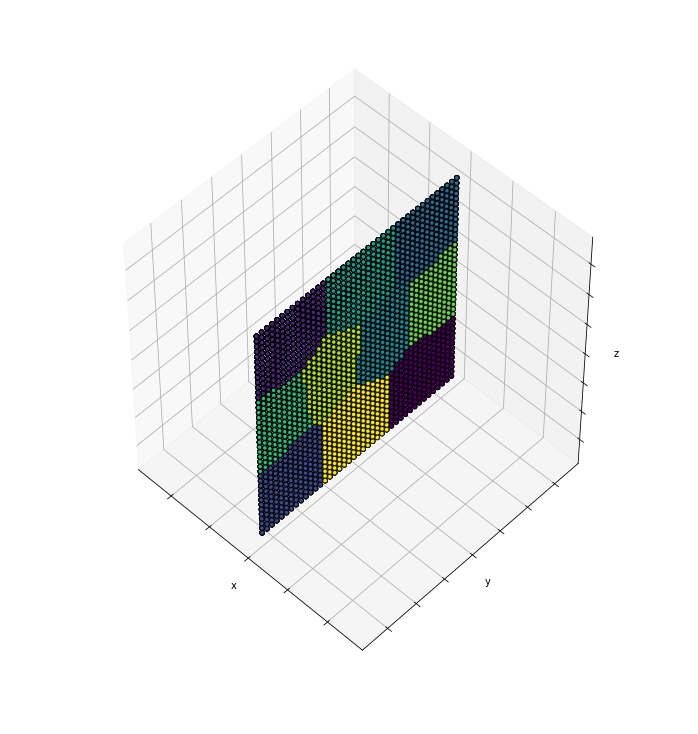

In [ ]:
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(point[:, 0], point[:, 1], point[:, 2],
            c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.dist = 12
fig.show()

In [ ]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(labels == i)[0] for i in range(kmeans.n_clusters)}
# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    dictlist.append(value)

In [ ]:
#Just to check
2243 in mydict[0]

False

In [ ]:
training_indices = []
evaluation_indices = []
test_indices = []
for l in dictlist:
  training_indices.extend(l[0 : int(len(l) * 0.8)])
  evaluation_indices.extend(l[int(len(l) * 0.8): int(len(l) * 0.8) + int(len(l) * 0.1)])
  test_indices.extend(l[int(len(l) * 0.8) + int(len(l) * 0.1) : ])

In [ ]:
training_number = len(training_indices)
training_number

14789

In [ ]:
eval_number = len(evaluation_indices)
eval_number

1846

In [ ]:
test_number = len(test_indices)
test_number

1856

In [ ]:
concat = np.concatenate((points, temps),axis = 1)
training = np.asarray([concat[i] for i in training_indices])
evaluation = np.asarray([concat[i] for i in evaluation_indices])
testing = np.asarray([concat[i] for i in test_indices])
train_points = training[:,0:5]
train_temps = training[:,5:]
eval_points = evaluation[:,0:5]
eval_temps = evaluation[:,5:]
test_points = testing[:,0:5]
test_temps = testing[:,5:]

In [ ]:
train_points.shape

(14789, 5)

In [ ]:
train_temps.shape

(14789, 100)

### **Building The Model**

In [ ]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
rnn_model = tf.keras.Sequential()
rnn_model.add(tf.keras.layers.RepeatVector(100,input_shape=(5,)))
rnn_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences= True)))
rnn_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences= True)))
rnn_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
rnn_model.add(tf.keras.layers.Dense(100))

In [ ]:
rnn_model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=["mse"])

In [ ]:
# Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 2)

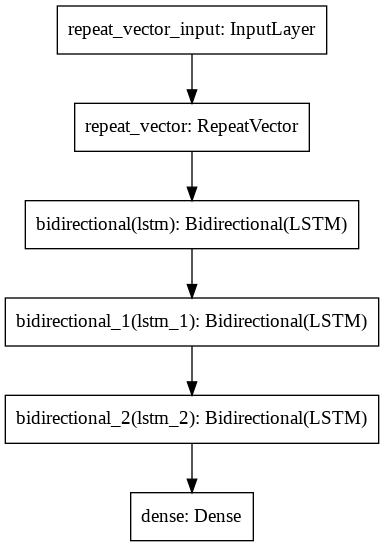

In [ ]:
plot_model(rnn_model)

In [ ]:
history = rnn_model.fit(x = train_points, y = train_temps, batch_size = 20, epochs = 30,  callbacks = [callback])

Epoch 1/30
757/757 [==============================] - 30s 40ms/step - loss: 0.1830 - mse: 0.1830
Epoch 2/30
757/757 [==============================] - 30s 40ms/step - loss: 0.0493 - mse: 0.0493
Epoch 3/30
757/757 [==============================] - 30s 40ms/step - loss: 0.0284 - mse: 0.0284
Epoch 4/30
757/757 [==============================] - 30s 40ms/step - loss: 0.0231 - mse: 0.0231
Epoch 5/30
757/757 [==============================] - 30s 40ms/step - loss: 0.0150 - mse: 0.0150
Epoch 6/30
757/757 [==============================] - 30s 40ms/step - loss: 0.0115 - mse: 0.0115
Epoch 7/30
757/757 [==============================] - 30s 40ms/step - loss: 0.0082 - mse: 0.0082
Epoch 8/30
757/757 [==============================] - 30s 40ms/step - loss: 0.0060 - mse: 0.0060
Epoch 9/30
757/757 [==============================] - 30s 40ms/step - loss: 0.0147 - mse: 0.0147
Epoch 10/30
757/757 [==============================] - 30s 40ms/step - loss: 0.0051 - mse: 0.0051
Epoch 11/30
757/757 [========

Run the following two cells just in case you want to visualize in tensorboard

In [ ]:
 %load_ext tensorboard

In [ ]:
 %tensorboard --logdir logs

In [ ]:
rnn_model.evaluate(x = eval_points, y = eval_temps)

53/53 [==============================] - 1s 19ms/step - loss: 0.0031 - mse: 0.0031


[0.003113779006525874, 0.003113779006525874]

In [ ]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
repeat_vector (RepeatVector) (None, 100, 5)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 512)          536576    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 512)          1574912   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               656384    
_________________________________________________________________
dense (Dense)                (None, 100)               25700     
Total params: 2,793,572
Trainable params: 2,793,572
Non-trainable params: 0
_________________________________________________________________


### **Determining the Test Error**

In [ ]:
prediction = rnn_model.predict(x = test_points)

In [ ]:
# Test Error
test_errors = tf.keras.losses.MSE(test_temps, prediction)
np.mean(test_errors)

0.06518916

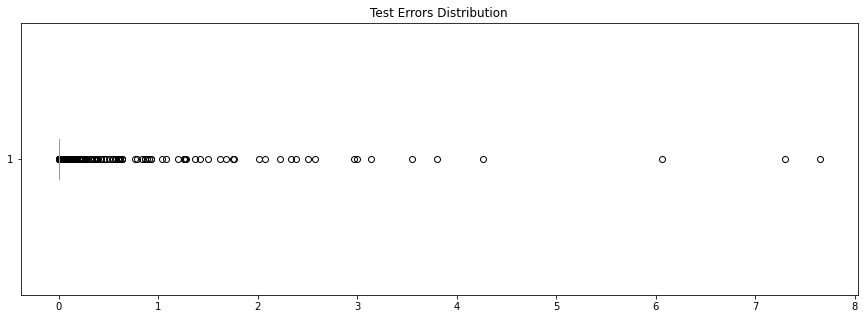

In [ ]:
fig1, ax1 = plt.subplots(figsize=(15, 5))
ax1.set_title('Test Errors Distribution')
ax1.boxplot(test_errors, vert=0)
plt.savefig('TEST ERRORS.png')

## **Predicting on all of the points**

---



In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

In [ ]:
predictions = rnn_model.predict(x = points)
predictions.shape

(18491, 100)

In [ ]:
for i in range(len(predictions)):
  predictions[i,:] = (predictions[i,:] * temps_std.reshape(100) ) + temps_mean.reshape(100,)
for i in range(len(predictions)):
  predictions[i,:] = moving_average(predictions[i,:] , 3)

tf.Tensor(1338610.5, shape=(), dtype=float32)


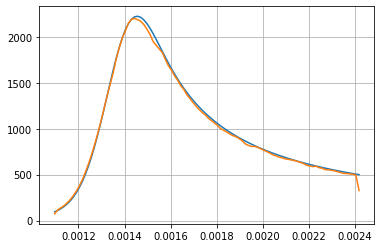

In [ ]:
# Test on point number x (Vary from 1 to 1681)
point_number = 50
fig, ax = plt.subplots()
ax.plot(times, (temps[point_number].reshape(100,1) * temps_std ) + temps_mean )
ax.plot(times, predictions[point_number])
plt.grid()
print(tf.keras.losses.MSE(temps[point_number], predictions[point_number]))

## **Predicting on Test Points**

In [ ]:
test_real = rnn_model.predict(x = test_points)
test_preds = rnn_model.predict(x = test_points)

In [ ]:
for i in range(len(test_preds) - 1):
  test_preds[i,:] = (test_preds[i,:] * temps_std.reshape(100) ) + temps_mean.reshape(100,)
for i in range(len(test_preds)):
  test_preds[i,:] = moving_average(test_preds[i,:] , 5)

In [ ]:
to_be_saved = np.concatenate((test_points[:,0:3], test_preds), axis = 1)
#np.savetxt("q300_v1000_pred.csv", to_be_saved, delimiter=",")

tf.Tensor(0.008529332, shape=(), dtype=float32)
x:  1.0
y:  14.0
z:  8.0
Power:  300.0
Speed:  1000.0


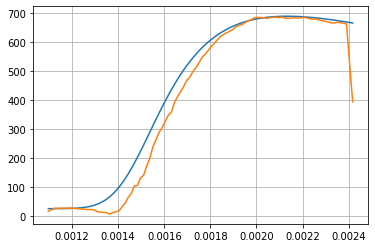

In [ ]:
point_number = 300
fig, ax = plt.subplots()
ax.plot(times, ((test_temps[point_number].reshape(100,1)* temps_std ) + temps_mean) )
ax.plot(times, test_preds[point_number])
plt.grid()
print(tf.keras.losses.MSE(test_temps[point_number], test_real[point_number]))
print("x: " , p11[point_number][0])
print("y: " , p11[point_number][1])
print("z: " , p11[point_number][2])
print("Power: " , p11[point_number][3])
print("Speed: " , p11[point_number][4])